In [1]:
import altair as A
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import numpy.random as nr
import scipy.stats as st

from numba import njit
import itertools as it

# Build dataset

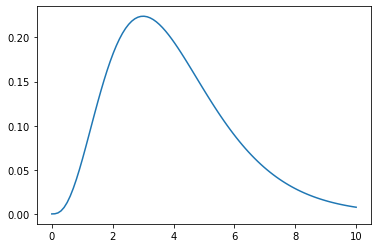

In [2]:
xs = np.linspace(0, 10, 100)
ys = st.gamma(4).pdf(xs)

plt.plot(xs, ys)

In [23]:
@njit
def gen_pre_post(win7, win7_fact, treat_fact, treat_std=.25, log=True):
    pre = nr.gamma(4 + win7_fact * win7)
    post = pre + nr.randn() * treat_std + treat_fact
    if log:
        return np.log(pre), np.log(post)
    return pre, post

(1.9288982688130367, 4.761386974922098)

In [20]:
n_each = 5

def gen_times(win7):
    times = st.gamma(4 + win7_factor * win7).rvs(len(gdf))
    return times

def gen_times_shape(gshape):
    times = st.gamma(gshape).rvs(len(gdf))
    return times

data_dct = [{'win7': win7} for win7 in (0, 1) for _ in range(n_each)]
df_ = pd.DataFrame(data_dct)

### With Numba

In [22]:
WIN7_FACT = 1.2
TREAT_FACT = .6

df_

,win7
0,0
1,0
2,0
3,0
4,0
5,1
6,1
7,1
8,1
9,1


In [ ]:
gen_pre_post()

In [33]:

    
def add_columns(df):
    pre_post = pd.DataFrame([gen_pre_post(win7, 
             win7_fact=WIN7_FACT,
              treat_fact=TREAT_FACT,
             ) for win7 in df_.win7], columns=['pre', 'post'])
    df = pd.concat([df, pre_post], ignore_index=False, axis=1)
    return df


df = df_.pipe(add_columns)
df.drop_duplicates()

,win7,pre,post
0,0,1.129883,1.366788
1,0,1.088595,1.287265
2,0,0.572989,0.793196
3,0,0.852735,1.292849
4,0,1.381514,1.501327
5,1,1.903713,1.932637
6,1,1.248023,1.469482
7,1,1.893699,1.995075
8,1,1.366891,1.474909
9,1,1.352144,1.561056


In [49]:


def gamma_shape(win7):
    return 4 + win7_factor * win7
    
def add_columns(df):
    df['gshape'] = gamma_shape(df.win7)
#     df['pre'] = df.groupby('win7').win7.transform(gen_times)
    df['pre'] = df.groupby('win7').gshape.transform(gen_times_shape)
    df['treat'] = df['pre'] + nr.randn(len(df)) * .25 + 1
    return df

df = pd.DataFrame(data_dct)
df = df.pipe(add_columns)
df.drop_duplicates()

,win7,gshape,pre,treat
0,0,4.0,3.215509,4.230110
1,0,4.0,5.825667,6.900656
2,0,4.0,1.547900,2.590860
3,0,4.0,4.355997,5.628185
4,0,4.0,3.691639,4.939300
...,...,...,...,...
195,1,5.2,4.874707,6.194402
196,1,5.2,5.457789,6.797929
197,1,5.2,2.150528,3.027601
198,1,5.2,6.277941,7.023167


In [62]:
def intervals(n):
    """
    0 <= n <= 100
    50% -> [.25, .75]
    """
    pm = n / 2 * .01
    return np.round(.5 - pm, 3), np.round(.5 + pm, 3)

intervals(95)

(0.025, 0.975)

In [74]:
def samp_probs(df, gb, col, quants=[50, 95]):
    """
    =>
        0.025 	0.250 	0.500 	0.750 	0.975
    win7 					
    0 	1.291482 	2.291133 	3.757434 	4.832630 	6.746378
    1 	1.893204 	3.907341 	5.420873 	6.753467 	9.801736
    """
    p1a, p1b = intervals(quants[0])
    p2a, p2b = intervals(quants[1])
    return df.groupby(gb)[col].quantile([p2a, p1a, .5, p1b, p2b])
        
        
sp = samp_probs(df, 'win7', 'pre', quants=[50, 95]).unstack()

sp

,0.025,0.250,0.500,0.750,0.975
win7,,,,,
0,1.291482,2.291133,3.757434,4.832630,6.746378
1,1.893204,3.907341,5.420873,6.753467,9.801736


In [73]:
def plot_probs(pdf):
    """
    """
    ix_labels = []
    for i, tup in enumerate(df.itertuples(index=True, name=None)):
        print(tup)
        ix_labels.append(ix)
        q1a, q2a, mid, q2b, q1b = row
        plt.plot([q1a, q1b], [i, i])
        
plot_probs(sp)

(0, 0, 4.0, 3.215509229320043, 4.230110324443039)


NameError: name 'ix' is not defined

In [56]:
df.groupby(['win7'])[['pre', 'treat']].quantile([.025, .25, .75, .975]).unstack()
# .T.unstack()

pre                                   treat                      \
         0.025     0.250     0.750     0.975     0.025     0.250     0.750   
win7                                                                         
0     1.291482  2.291133  4.832630  6.746378  2.187699  3.440991  6.001139   
1     1.893204  3.907341  6.753467  9.801736  2.651389  4.877444  8.005081   

                 
          0.975  
win7             
0      7.809183  
1     10.797514

In [37]:
df.groupby('win7').pre.mean()

win7
0    3.943179
1    5.037273
Name: pre, dtype: float64

In [25]:

for win7, gdf in df.groupby('win7'):
    1
    
del win7

In [26]:
win7_factor = 1.2

0      2.478191
1      5.925980
2      3.496899
3      2.763261
4      4.099979
         ...   
195    6.584048
196    4.732905
197    8.471105
198    5.075637
199    6.515102
Name: win7, Length: 200, dtype: float64

array([ 6.34287986,  8.29400055,  3.86011934,  4.71740867,  4.077222  ,
        2.74979419,  8.05449351,  3.4211673 ,  2.23160687,  5.08236236,
        8.17839293,  9.21811824,  6.40418047,  5.56704633,  9.84224384,
        2.03353503,  4.13683286,  3.87037225,  7.30763174,  4.8991104 ,
        6.44674736,  2.24350709,  8.75822267,  2.64080528,  3.2023845 ,
        5.52908504,  5.97947929,  3.20193954,  5.259023  ,  4.83426586,
        6.35296539,  5.06066637,  1.60063074,  5.09167683,  5.49627631,
        4.65179492,  3.70787895,  3.37974924,  6.70361139,  7.42513825,
        2.0560458 ,  4.74936638,  6.10453699,  8.67311461,  5.51279369,
        3.15418694,  3.91993632,  9.99633637,  6.7461091 ,  4.33455114,
        5.24775049,  4.32623756,  1.98115635,  2.75205097,  5.68386713,
        3.86207278,  2.32579618,  6.46534093,  5.46840658,  4.40755722,
        4.24911786,  4.93793056,  3.3571879 , 10.49017258,  4.87070195,
        7.55808437,  5.85716964,  7.41336521,  2.89036723,  5.58

In [22]:
gdf

,win7
100,1
101,1
102,1
103,1
104,1
...,...
195,1
196,1
197,1
198,1


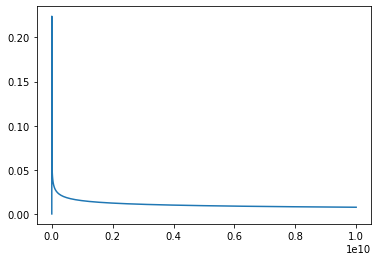

In [10]:
plt.plot(10 ** xs, ys)